# Task
Apply ML models for the prediction of unemployment and other relevant class

Here is all the data you need:
"Global_Education.csv"

## Data loading

### Subtask:
Load the data from "Global_Education.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data into a dataframe, then display the head and info to verify the data is loaded correctly.



In [ ]:
import pandas as pd

df = pd.read_csv('Global_Education.csv')
display(df.head())
display(df.info())

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16780-16781: invalid continuation byte

**Reasoning**:
The previous command failed due to a UnicodeDecodeError. Trying to read the CSV with a different encoding, such as 'latin1', might resolve this issue.



In [ ]:
df = pd.read_csv('Global_Education.csv', encoding='latin1')
display(df.head())
display(df.info())

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

None

## Data cleaning

### Subtask:
Handle missing values, potentially drop duplicates, and address any inconsistencies in the data.


**Reasoning**:
Check for missing values in the DataFrame.



In [ ]:
missing_values = df.isnull().sum()
display("Missing values per column:")
display(missing_values)

'Missing values per column:'

,0
Countries and areas,0
Latitude,0
Longitude,0
OOSR_Pre0Primary_Age_Male,0
OOSR_Pre0Primary_Age_Female,0
OOSR_Primary_Age_Male,0
OOSR_Primary_Age_Female,0
OOSR_Lower_Secondary_Age_Male,0
OOSR_Lower_Secondary_Age_Female,0
OOSR_Upper_Secondary_Age_Male,0


**Reasoning**:
Check for duplicate rows in the DataFrame.



In [ ]:
duplicate_rows = df.duplicated().sum()
display("Number of duplicate rows:")
display(duplicate_rows)
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    display("Duplicate rows dropped.")

'Number of duplicate rows:'

np.int64(0)

## Data exploration

### Subtask:
Explore the data to understand the distributions of relevant features and identify potential relationships with unemployment.


**Reasoning**:
Calculate and display descriptive statistics for numerical columns in the DataFrame `df` using the `.describe()` method, get a list of all column names, examine the data types of each column using `.info()` and display value counts or unique values for key columns related to education and potential unemployment indicators to understand their distribution.



In [ ]:
display(df.describe())
display(df.columns.values)
display(df.info())
# Identify potential education and unemployment related columns
education_unemployment_cols = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
    'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female',
    'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math',
    'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
    'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment',
    'Unemployment_Rate'
]
for col in education_unemployment_cols:
    if col in df.columns:
        if df[col].dtype == 'object':
            display(f"Value counts for {col}:")
            display(df[col].value_counts())
        else:
            display(f"Unique values for {col}:")
            display(df[col].unique())

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


array(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male',
       'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate',
       'Gross_Primary_Education_Enrollment',
       'Gross_Terti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

None

'Unique values for OOSR_Pre0Primary_Age_Male:'

array([ 0,  4, 31, 14,  2, 52, 13, 32,  6,  3, 18, 15, 58,  9, 72, 79, 17,
       19, 81, 48, 56, 85,  8, 71, 78,  5,  1, 10, 21,  7, 63, 57, 73, 12,
       62, 42, 16, 24, 50, 55, 22, 11, 43, 53, 30, 23, 88, 33, 76, 51, 25,
       28, 65, 49, 36, 35, 60, 87, 20, 45, 38, 96])

'Unique values for OOSR_Pre0Primary_Age_Female:'

array([ 0,  2, 39,  4, 50, 14, 19, 28, 10, 16, 59,  8, 73, 78,  1, 18, 20,
       81, 44, 57, 87, 70,  5, 88,  7,  6,  3, 63, 17, 55, 12, 64, 36, 60,
       22, 49, 23, 30, 21, 38, 31, 34, 24, 76, 51, 13, 29, 47, 65, 46, 48,
       83, 33, 27, 61, 25,  9, 42, 96, 58])

'Unique values for OOSR_Primary_Age_Male:'

array([ 0,  6,  4,  9, 10,  2,  1,  3,  5, 12, 13, 21, 17, 18, 15, 32, 14,
       56, 45, 11, 19,  8, 22, 38, 25, 37, 30, 58, 31, 27,  7])

'Unique values for OOSR_Primary_Age_Female:'

array([ 0,  3,  1,  9,  7,  2, 10,  5, 13, 22,  6, 35, 18, 16,  8,  4, 55,
       50, 17, 29, 14, 19, 21, 44, 27, 11, 15, 45, 67, 28, 12])

'Unique values for OOSR_Lower_Secondary_Age_Male:'

array([ 0,  6,  1, 11,  2, 23,  7,  9, 27, 18, 13,  8, 12, 48, 36, 14, 33,
       55,  5, 20,  4,  3, 41, 10, 17, 32, 45, 30, 43, 44, 19, 29, 21, 31,
       15, 49, 39, 22, 61, 16, 37])

'Unique values for OOSR_Lower_Secondary_Age_Female:'

array([ 0,  1,  2,  9,  3, 21, 11, 43,  6, 14,  7, 13, 44, 31, 40, 70,  5,
       18, 48, 10, 17, 49,  4,  8, 35, 60, 12, 30, 28, 26, 29, 56, 25, 47,
       20, 69, 19, 16, 63, 39, 32, 34])

'Unique values for OOSR_Upper_Secondary_Age_Male:'

array([44, 21,  0, 14, 15, 16, 10, 29, 18, 41,  7,  6,  1, 38, 46, 33, 22,
       24, 19, 67, 50, 71,  5, 52, 30, 20,  3, 11, 66, 23, 45, 73, 12, 28,
        4,  8, 57, 59, 58, 47, 25,  2, 48, 42, 63, 62, 26, 65, 84, 35, 40,
       36, 51, 64, 32, 53, 27, 43, 17, 61])

'Unique values for OOSR_Upper_Secondary_Age_Female:'

array([69, 15,  0, 12,  7,  4,  6,  9, 24, 36,  3,  2, 35, 66, 22, 19, 14,
       16, 65, 62, 58, 85,  5, 20, 48, 27, 64, 11,  8, 67, 17, 21, 18, 53,
       75, 28, 61, 76, 54,  1, 43, 26, 46, 29, 31, 32, 79, 41, 59, 10, 30,
       73, 38, 60, 13, 89, 51, 49, 57, 72, 50, 34, 33, 39, 88, 68])

'Unique values for Completion_Rate_Primary_Male:'

array([ 67,  94,  93,   0,  63,  91,  99,  76, 100,  95,  51,  32,  46,
        68,  75,  54,  31,  96,  97,  78,  98,  60,  88,  84,  64,  47,
        66,  69,  80,  52,  29,  49,  81,  92,  77,  36,  43,  50,  44,
        82,  35,  71,  89,  48,  79,  83,  39,  70,  86])

'Unique values for Completion_Rate_Primary_Female:'

array([ 40,  96,  93,   0,  57,  94,  99,  89, 100,  44,  71,  98,  97,
        29,  54,  79,  74,  33,  24,  95,  77,  82,  53,  66,  92,  48,
        75,  60,  73,  76,  39,  25,  58,  87,  91,  83,  52,  41,  84,
        86,  55,  61,  50,  65,  18,  64,  90,  85,  43])

'Unique values for Completion_Rate_Lower_Secondary_Male:'

array([ 49,  98,   0,  42,  70,  95,  59, 100,  55,  25,  41,  97,  92,
        81,  13,  26,  52,  16,  18,  94,  93,  74,  47,  56,  36,  58,
        76,  89,  79,  73,  19,  32,  50,  45,  33,  80,  46,  82,  64,
        86,  61,  69,  99,  54,  29,  23,  53,  87,  15,  48,  71,  10,
        66,  75,  83,  85,  27,  22,  63,  65,  68,  96,  31])

'Unique values for Completion_Rate_Lower_Secondary_Female:'

array([ 26,  97,  65,   0,  32,  79,  99,  71,  98, 100,  66,  13,  38,
        92,  89,   6,  19,  39,  43,   8,  10,  93,  81,  45,  76,  22,
        52,  74,  54,  33,  48,  50,  20,  16,  88,  59,  47,  69,  53,
        55,  23,  27,  21,  25,  40,  90,  11,  62,  75,   4,  95,  83,
        30,  36,  42,  91,  96,  58,  70,  80,  73,  87])

'Unique values for Completion_Rate_Upper_Secondary_Male:'

array([ 32,  76,  22,   0,  24,  46,  69,  91,  48,  12,  25,  92,  55,
        65,   6,   4,  20,  26,   8,  15,  83,  63,  28,  56,  17,  85,
       100,  36,  78,  43,  34,  31,  11,  14,  33,  79,  27,  49,  29,
        40,  45,  80,  95,  44,  13,  89,  18,  16,  23,  60,  57,  86,
        74,  19,  70,  71,  52,  59,  51,  93,  97,  50,  37])

'Unique values for Completion_Rate_Upper_Secondary_Female:'

array([ 14,  80,  37,   0,  15,  53,  79,  27,  97,  94,  51,   5,  18,
        92,  66,  75,   2,   3,  20,  21,   6,  88,  67,  78,  32,  19,
        60,  86, 100,  41,  36,  33,  28,  83,   9,  25,  13,   8,  64,
        16,  35,  40,  43,  63,  96,  38,  85,  31,  12,  23,  73,  90,
        39,   1,  44,  68,  72,  71,  10,  81,  52,   4,  26,  55,  56,
        57,  95,  29,  61])

'Unique values for Grade_2_3_Proficiency_Reading:'

array([22,  0, 76, 94, 69, 47,  9, 80, 36, 79, 30, 96, 18, 82, 38, 89, 17,
       97, 44, 74, 98,  5, 86, 68, 70, 66, 91, 53, 39, 99, 13, 73, 78, 90,
       61, 59, 35, 65, 63, 29,  6, 19, 33, 20])

'Unique values for Grade_2_3_Proficiency_Math:'

array([25,  0, 71, 70, 40, 34, 59, 97, 57, 69, 48, 90, 85, 64, 72, 84, 33,
       74, 78, 80, 65, 82, 47, 52, 53, 18, 95, 42, 12, 77, 16, 83, 44, 27,
       86, 32, 51, 36, 63, 93, 75, 67, 21])

'Unique values for Primary_End_Proficiency_Reading:'

array([13,  0, 46, 98, 81, 44, 23, 53, 95, 21,  7, 50, 24,  3, 70, 55, 17,
       68, 22, 38, 94, 36, 31, 97,  4, 88, 58, 35,  2, 29, 99, 93, 16, 59])

'Unique values for Primary_End_Proficiency_Math:'

array([11,  0, 56, 55, 64, 32, 16, 52, 75, 22, 40, 12,  3, 48,  6, 60, 67,
       58, 77, 34, 44, 80, 35, 81,  5, 78, 69, 20,  1, 70, 23, 53, 89, 29,
       72, 65, 13, 57, 68, 51])

'Unique values for Lower_Secondary_End_Proficiency_Reading:'

array([ 0, 48, 21, 80, 76, 54, 77, 79, 56, 46, 50, 53,  8, 86, 68, 58, 78,
       84, 49, 89, 36, 69, 30, 75, 74, 88, 83, 59, 32, 71, 64, 55, 27, 81,
       45, 19, 85, 57,  9, 62, 82, 40, 28,  5])

'Unique values for Lower_Secondary_End_Proficiency_Math:'

array([ 0, 58, 19, 31, 50, 78, 79, 39, 57, 71, 80, 42, 32, 52, 56, 10, 84,
       28, 35, 40, 69, 63, 85,  9, 29, 21, 90, 64, 11, 15, 67, 34, 66, 62,
       89, 41, 51, 18, 83, 74, 73, 59, 44, 54, 14, 81, 23,  8, 77, 36, 53,
       60, 94, 75, 47, 48, 25, 46, 49,  2])

'Unique values for Youth_15_24_Literacy_Rate_Male:'

array([ 74,  99,  98,   0, 100,  94,  70,  62,  88,  48,  78,  85,  64,
        93,  95,  82,  97,  58,  51,  84,  71,  73,  89,  96])

'Unique values for Youth_15_24_Literacy_Rate_Female:'

array([ 56, 100,  97,   0,  99,  96,  52,  55,  82,  29,  78,  79,  53,
        98,  93,  91,  92,  43,  90,  88,  81,  36,  68,  89,  63,  47,
        73,  85])

'Unique values for Gross_Primary_Education_Enrollment:'

array([104. , 107. , 109.9, 106.4, 113.5,   0. , 105. , 109.7,  92.7,
       100.3, 103.1,  99.7,  81.4,  99.4, 116.5, 100.5, 103.9, 111.7,
       122. , 100.1,  98.2, 103.2, 115.4,  89.3,  96.1, 121.4, 107.4,
       103.4, 100.9, 102. ,  86.8, 101.4, 100.2, 114.5,  99.5, 106.6,
       113.3,  99.8,  96.5, 101.9,  99.3, 100.7, 112.8, 108. , 101.3,
        75.3, 114.7, 105.7, 103.3, 106.3,  94.8,  61.8,  68.4,  97.2,
       101. , 102.5, 139.9,  98. ,  98.6, 104.8,  99.6, 106.9,  91.5,
       118.7,  97.8, 113.6, 100.8, 100.4, 113. , 110.7, 108.7, 104.9,
        91. ,  98.8,  81.5, 104.4,  92.4, 107.6, 102.4,  95.1, 120.9,
        85.1, 109. , 104.7, 102.3, 142.5, 105.3,  97.1,  75.6,  84.7,
        99.9, 101.1, 105.8, 100. , 113.9, 112.6, 112.3, 124.2, 142.1,
       104.2, 120.6,  74.7,  94.3,  94.4, 108.5, 107.5, 106.2, 103.8,
        98.1,  90.6,  85.2, 102.6, 133. , 113.4, 110.5, 108.1, 106.8,
        81. , 100.6,  98.7,  23.4,  73. , 102.7,  76.8, 108.8, 126.6,
       105.2,  81.7,

'Unique values for Gross_Tertiary_Education_Enrollment:'

array([  9.7,  55. ,  51.4,   0. ,   9.3,  24.8,  90. ,  54.6, 113.1,
        85.1,  27.7,  15.1,  50.5,  20.6,  65.4,  87.4,  79.7,  24.7,
        12.3,  15.6,  23.3,  24.9,  51.3,  31.4,  71. ,   6.5,   6.1,
        23.6,  13.7,  12.8,  68.9,   3. ,   3.3,  88.5,  50.6,  55.3,
         9. ,  12.7,  55.2,  67.9,  41.4,  75.9,  64.1,  27. ,   6.6,
        80.6,   5.3,   7.2,  59.9,  44.9,  35.2,  29.4,   1.9,   3.4,
        69.6,   8.1,  16.1,  88.2,  65.6,   8.3,   2.7,  63.9,  70.2,
        15.7, 136.6, 104.6,  21.8,  11.6,   2.6,   1.1,  26.2,  48.5,
        71.8,  28.1,  36.3,  68.1,  16.2,  77.8,  63.4,  61.9,  27.1,
        63.2,  34.4,  61.7,  11.5,  54.4,  41.3,  15. ,  88.1,  26.3,
        10.2,  11.9,  60.5,  35.6,  72.4,  19.2,   5.4,   0.8,  45.1,
        31.2,   4.5,  54.3,  23.7,   5. ,  40.6,  40.2,  14.1,  56.1,
        35.9,   7.3,  18.8,  22.9,  12.4,  85. ,  82. ,  17.4,   4.4,
        38. ,  54.7,  47.8,   1.8,  34.6,  70.7,  35.5,  67.8,  17.9,
        94.3,  39.8,

'Unique values for Unemployment_Rate:'

array([11.12, 12.33, 11.7 ,  0.  ,  6.89,  9.79, 16.99,  5.27,  4.67,
        5.51, 10.36,  0.71,  4.19, 10.33,  4.59,  5.59,  6.41,  2.23,
        2.34,  3.5 , 18.42, 18.19, 12.08,  9.12,  4.34,  6.26,  1.43,
       12.25,  0.68,  3.38,  5.56,  3.68,  1.89,  7.09,  4.32,  9.71,
        9.47, 11.85,  3.32,  6.93,  1.64,  7.27,  1.93,  2.74,  4.24,
        4.91, 10.3 ,  5.84,  3.97, 10.76,  4.11,  6.43,  5.14,  5.11,
        2.08,  4.1 ,  6.59,  8.43, 20.  ,  9.06, 14.4 ,  3.04,  4.33,
       17.24,  2.46,  4.3 ,  2.47, 13.78,  5.39,  3.4 ,  2.84,  5.36,
        4.69, 11.38, 12.82,  4.93,  3.86,  9.89,  8.  ,  2.29, 14.72,
        2.64,  2.18,  6.33,  0.63,  6.52,  6.23, 23.41,  2.81, 18.56,
        6.35,  1.76,  5.65,  6.14,  7.22,  3.47,  9.55,  6.67,  3.42,
        6.01, 14.88,  9.02,  3.24,  1.58, 20.27,  1.41,  3.2 ,  4.07,
        6.84,  0.47,  8.1 ,  3.35,  2.67,  4.45,  3.9 ,  4.81,  3.31,
        2.15,  0.09,  4.15,  5.47,  3.98,  1.03, 20.71, 18.88,  8.36,
       13.37,  5.93,

**Reasoning**:
Calculate correlation coefficients between numerical columns and the 'Unemployment_Rate' column to understand potential linear relationships.



In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
display("Correlation matrix:")
display(correlation_matrix)
if 'Unemployment_Rate' in correlation_matrix.columns:
    unemployment_correlation = correlation_matrix['Unemployment_Rate'].sort_values(ascending=False)
    display("Correlation with Unemployment_Rate:")
    display(unemployment_correlation)
else:
    display("Unemployment_Rate column not found in numerical columns.")

'Correlation matrix:'

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
Latitude,1.000000,-0.296737,-0.251144,-0.232117,-0.256220,-0.265878,-0.314519,-0.297764,-0.328922,-0.319757,...,0.169082,0.201129,0.639275,0.674029,-0.145076,-0.134280,-0.509112,0.006552,0.578970,0.080760
Longitude,-0.296737,1.000000,-0.099692,-0.105877,-0.142288,-0.144630,-0.077958,-0.118649,0.024929,-0.049288,...,-0.029954,-0.019363,-0.128971,-0.145667,-0.008159,0.008052,-0.163862,-0.118375,-0.092477,-0.278258
OOSR_Pre0Primary_Age_Male,-0.251144,-0.099692,1.000000,0.984145,0.541979,0.578650,0.534625,0.533876,0.475048,0.476920,...,-0.097947,-0.115318,-0.359043,-0.358424,0.002011,-0.012017,0.451898,-0.083844,-0.362917,0.130623
OOSR_Pre0Primary_Age_Female,-0.232117,-0.105877,0.984145,1.000000,0.537058,0.582072,0.531879,0.539081,0.456563,0.467279,...,-0.101869,-0.108964,-0.344785,-0.346009,0.008926,-0.006110,0.469859,-0.049785,-0.336194,0.132268
OOSR_Primary_Age_Male,-0.256220,-0.142288,0.541979,0.537058,1.000000,0.964160,0.560956,0.572686,0.406544,0.419825,...,-0.050654,-0.073999,-0.258051,-0.265992,0.018375,0.005537,0.388390,-0.179302,-0.293258,0.074100
OOSR_Primary_Age_Female,-0.265878,-0.144630,0.578650,0.582072,0.964160,1.000000,0.660776,0.698991,0.483657,0.517142,...,-0.065103,-0.089894,-0.264240,-0.271403,0.034565,0.014447,0.413471,-0.184440,-0.299394,0.048978
OOSR_Lower_Secondary_Age_Male,-0.314519,-0.077958,0.534625,0.531879,0.560956,0.660776,1.000000,0.966085,0.807592,0.808483,...,-0.071948,-0.071277,-0.310789,-0.329829,0.034276,0.006352,0.438541,-0.036796,-0.331477,-0.030075
OOSR_Lower_Secondary_Age_Female,-0.297764,-0.118649,0.533876,0.539081,0.572686,0.698991,0.966085,1.000000,0.772854,0.812555,...,-0.073749,-0.083238,-0.302235,-0.318292,0.007934,-0.025590,0.465821,-0.035797,-0.328637,-0.042566
OOSR_Upper_Secondary_Age_Male,-0.328922,0.024929,0.475048,0.456563,0.406544,0.483657,0.807592,0.772854,1.000000,0.965080,...,-0.083403,-0.054080,-0.359459,-0.377139,0.128415,0.108487,0.378810,-0.030308,-0.378626,-0.103774
OOSR_Upper_Secondary_Age_Female,-0.319757,-0.049288,0.476920,0.467279,0.419825,0.517142,0.808483,0.812555,0.965080,1.000000,...,-0.075684,-0.069173,-0.358775,-0.375763,0.100055,0.073178,0.443845,0.002852,-0.382639,-0.104612


'Correlation with Unemployment_Rate:'

,Unemployment_Rate
Unemployment_Rate,1.000000
Completion_Rate_Lower_Secondary_Female,0.297181
Completion_Rate_Lower_Secondary_Male,0.285564
Completion_Rate_Upper_Secondary_Female,0.285201
Completion_Rate_Primary_Female,0.281272
Completion_Rate_Primary_Male,0.277663
Completion_Rate_Upper_Secondary_Male,0.267683
Gross_Primary_Education_Enrollment,0.215464
Birth_Rate,0.143130
Gross_Tertiary_Education_Enrollment,0.140702


## Feature engineering

### Subtask:
Create new features or transform existing ones that could be predictive of unemployment (e.g., interaction terms, polynomial features).


**Reasoning**:
Create the total out-of-school rate, total completion rate, total proficiency score, and gender gap in youth literacy rate features, handling missing values by filling with 0.



In [ ]:
ooser_cols = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female'
]
df['Total_OOSR'] = df[ooser_cols].fillna(0).sum(axis=1)

completion_cols = [
    'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
    'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female'
]
df['Total_Completion_Rate'] = df[completion_cols].fillna(0).sum(axis=1)

proficiency_cols = [
    'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math'
]
df['Total_Proficiency_Score'] = df[proficiency_cols].fillna(0).sum(axis=1)

df['Youth_Literacy_Gender_Gap'] = (df['Youth_15_24_Literacy_Rate_Male'] - df['Youth_15_24_Literacy_Rate_Female']).abs().fillna(0)

display(df[['Total_OOSR', 'Total_Completion_Rate', 'Total_Proficiency_Score', 'Youth_Literacy_Gender_Gap']].head())

,Total_OOSR,Total_Completion_Rate,Total_Proficiency_Score,Youth_Literacy_Gender_Gap
0,113,228,71,18
1,58,541,106,1
2,0,359,40,1
3,0,0,0,0
4,70,233,0,0


**Reasoning**:
Display the head of the dataframe with the new features to verify their creation.



In [ ]:
display(df.head())

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Total_OOSR,Total_Completion_Rate,Total_Proficiency_Score,Youth_Literacy_Gender_Gap
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,74,56,32.49,104.0,9.7,11.12,113,228,71,18
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,99,100,11.78,107.0,55.0,12.33,58,541,106,1
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,98,97,24.28,109.9,51.4,11.70,0,359,40,1
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,7.20,106.4,0.0,0.00,0,0,0,0
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,40.73,113.5,9.3,6.89,70,233,0,0


## Data preparation

### Subtask:
Prepare the data for model training, including splitting into training and testing sets and potentially scaling numerical features.


**Reasoning**:
Prepare the data for model training by separating features and target, splitting the data into training and testing sets, identifying numerical features, and scaling the numerical features.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Identify the target variable
target_variable = 'Unemployment_Rate'

# 2. Separate features (X) and target variable (y)
# Exclude non-numeric columns and the target variable from features
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target_variable])
y = df[target_variable]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Identify the numerical features in the training set
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# 5. Initialize a StandardScaler
scaler = StandardScaler()

# 6. Fit the scaler on the numerical features of the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# 7. Replace the original numerical columns in X_train and X_test with the scaled values
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled

display("X_train after scaling:")
display(X_train.head())
display("X_test after scaling:")
display(X_test.head())
display("y_train head:")
display(y_train.head())
display("y_test head:")
display(y_test.head())

'X_train after scaling:'

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Total_OOSR,Total_Completion_Rate,Total_Proficiency_Score,Youth_Literacy_Gender_Gap
199,-0.630953,-0.080469,2.841704,2.834231,0.428039,1.325443,0.971499,1.521082,1.075462,1.891463,...,-0.811515,-0.785751,-0.772164,1.052460,-0.017977,-0.836169,2.204946,0.447085,-0.935420,-0.309407
38,-1.284641,0.491728,-0.689027,-0.734809,-0.266062,-0.359732,-0.237134,-0.295734,0.017523,-0.061406,...,0.275714,1.418805,1.452622,-0.348188,0.673330,0.676715,-0.424656,1.440741,1.674499,-0.309407
24,-0.709390,-0.004810,-0.802921,-0.734809,-0.464376,-0.448425,-0.521518,-0.421031,-0.246962,-0.305515,...,0.182523,1.418805,1.452622,-0.434548,0.703099,0.542535,-0.614748,1.507302,1.729694,-0.309407
122,-0.252171,0.972432,2.537985,2.533680,-0.563533,-0.537118,0.900403,0.643999,1.119543,0.670920,...,-0.811515,-0.785751,-0.772164,-0.108000,0.600561,-0.547681,1.484181,0.494628,-0.935420,-0.309407
197,-1.174350,0.320661,-0.271413,-0.246414,0.428039,0.349815,0.402730,0.205457,0.282008,-0.102091,...,-0.811515,-0.785751,-0.772164,-0.078314,0.101100,1.481798,0.058494,-0.879375,-0.935420,-0.309407


'X_test after scaling:'

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Total_OOSR,Total_Completion_Rate,Total_Proficiency_Score,Youth_Literacy_Gender_Gap
95,0.895944,0.502132,-0.385308,-0.396690,-0.563533,-0.537118,-0.521518,-0.421031,0.370169,0.182702,...,-0.811515,1.441073,1.475095,0.751100,0.445100,0.207084,-0.266246,1.835351,-0.068075,-0.309407
15,-0.771362,0.164266,-0.575132,-0.396690,-0.464376,-0.359732,-0.166038,-0.421031,-0.643689,-0.753047,...,-0.811515,-0.785751,-0.772164,-0.728711,0.173869,1.015521,-0.606827,1.887649,-0.935420,-0.309407
30,-0.572258,-0.645866,-0.081589,-0.058570,0.031410,0.083735,0.331634,0.205457,0.326088,0.101333,...,-0.811515,-0.785751,-0.772164,0.066519,0.326023,-0.386665,0.121857,-0.879375,-0.935420,-0.309407
159,-1.278171,0.074351,-0.461238,-0.546965,-0.563533,-0.537118,-0.663710,-0.608978,0.105684,-0.386884,...,-0.811515,1.418805,1.475095,-0.148481,0.206946,-0.604708,-0.511782,-0.879375,-0.935420,-0.056541
186,-0.265397,0.436255,-0.081589,-0.772378,-0.563533,-0.537118,0.900403,0.456052,0.326088,0.548865,...,-0.811515,-0.785751,-0.772164,-1.686765,-3.113972,-1.178330,0.050573,-0.879375,-0.935420,-0.309407


'y_train head:'

,Unemployment_Rate
199,12.91
38,9.71
24,12.08
122,1.58
197,8.80


'y_test head:'

,Unemployment_Rate
95,6.33
15,10.33
30,12.25
159,0.00
186,0.00


## Model training

### Subtask:
Train several relevant machine learning models for predicting unemployment.


**Reasoning**:
Import the necessary regression models, initialize three of them with default parameters, and train them using the scaled training data.



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
random_forest_reg = RandomForestRegressor()
gradient_boosting_reg = GradientBoostingRegressor()

# Train models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using appropriate metrics.


**Reasoning**:
Import the necessary evaluation metrics and create a dictionary to store the trained models.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    "Linear Regression": linear_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg,
    "Random Forest Regressor": random_forest_reg,
    "Gradient Boosting Regressor": gradient_boosting_reg
}

print("Evaluation metrics imported and models dictionary created.")

Evaluation metrics imported and models dictionary created.


**Reasoning**:
Iterate through the trained models, make predictions, calculate evaluation metrics, and store the results.



In [ ]:
evaluation_results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    evaluation_results[model_name] = {
        "Mean Squared Error (MSE)": mse,
        "R-squared (R2)": r2,
        "Mean Absolute Error (MAE)": mae
    }

print("Model evaluation completed.")

Model evaluation completed.


**Reasoning**:
Summarize and display the evaluation results for all models.



In [ ]:
import pandas as pd

evaluation_df = pd.DataFrame(evaluation_results).T
display("Evaluation Results:")
display(evaluation_df)

'Evaluation Results:'

,Mean Squared Error (MSE),R-squared (R2),Mean Absolute Error (MAE)
Linear Regression,36.223645,-0.006347,4.460037
Ridge Regression,32.751086,0.090126,4.250985
Lasso Regression,33.985245,0.055839,4.392289
Random Forest Regressor,29.820588,0.171539,3.923880
Gradient Boosting Regressor,34.053866,0.053932,4.186236


## Summary:

### Data Analysis Key Findings

*   The dataset was loaded successfully after addressing a `UnicodeDecodeError` by specifying 'latin1' encoding.
*   No missing values or duplicate rows were found in the initial data cleaning steps.
*   Initial data exploration revealed that the dataset contains features related to education access, completion, proficiency, literacy, enrollment, and unemployment rate.
*   Several numerical features showed some correlation with the 'Unemployment\_Rate', including positive correlations with some completion and enrollment rates, and negative or low correlations with out-of-school rates and proficiency scores. Longitude also showed a negative correlation with Unemployment Rate.
*   New features such as `Total_OOSR`, `Total_Completion_Rate`, `Total_Proficiency_Score`, and `Youth_Literacy_Gender_Gap` were engineered and added to the dataset.
*   The data was successfully split into training and testing sets (80/20 split), and numerical features were scaled using `StandardScaler`.
*   Five different regression models (Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor) were trained on the scaled training data.
*   Model evaluation using MSE, R-squared, and MAE on the test set indicated that the Random Forest Regressor performed best among the tested models, achieving the lowest MSE (29.82) and MAE (3.92) and the highest R-squared (0.171).

### Insights or Next Steps

*   The relatively low R-squared values across all models suggest that the current features may not fully capture the factors influencing unemployment, or that the relationship is non-linear and not well-captured by the linear models. Further feature engineering or exploring non-linear models could be beneficial.
*   Although Random Forest performed best, the overall performance is modest. Investigating feature importance from the tree-based models (Random Forest and Gradient Boosting) could reveal which features are most influential in predicting unemployment and guide further data collection or feature creation.


# Task
apply ML in prediction of suitable class that will give high accuracy

Here is all the data you need:
"Global_Education.csv"

## Data loading

### Subtask:
Load the data from "Global_Education.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data into a dataframe.



In [ ]:
import pandas as pd

df = pd.read_csv('Global_Education.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16780-16781: invalid continuation byte

**Reasoning**:
The previous attempt to read the CSV failed due to a UnicodeDecodeError. This suggests that the file is not encoded in UTF-8. I will try reading the file again, specifying a different encoding, such as 'latin1'.



In [ ]:
df = pd.read_csv('Global_Education.csv', encoding='latin1')
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


## Data cleaning

### Subtask:
Handle missing values, outliers, and potential inconsistencies in the data.


**Reasoning**:
Identify columns with missing values and calculate the percentage of missing data to determine the appropriate handling strategy.



In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
display(missing_info)

,Missing Values,Percentage


**Reasoning**:
Since there are no missing values according to the previous step, the next step is to identify and handle potential outliers in the numerical columns.



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR
outliers = ((df[numerical_cols] < (Q1 - outlier_threshold)) | (df[numerical_cols] > (Q3 + outlier_threshold)))

outlier_counts = outliers.sum().sort_values(ascending=False)
display(outlier_counts)

# Capping outliers
for col in numerical_cols:
    upper_limit = Q3[col] + outlier_threshold[col]
    lower_limit = Q1[col] - outlier_threshold[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))


NameError: name 'np' is not defined

**Reasoning**:
The previous command failed because the `numpy` library was not imported. The code needs to be regenerated with the `numpy` import added.



In [ ]:
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR
outliers = ((df[numerical_cols] < (Q1 - outlier_threshold)) | (df[numerical_cols] > (Q3 + outlier_threshold)))

outlier_counts = outliers.sum().sort_values(ascending=False)
display(outlier_counts)

# Capping outliers
for col in numerical_cols:
    upper_limit = Q3[col] + outlier_threshold[col]
    lower_limit = Q1[col] - outlier_threshold[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))

,0
Primary_End_Proficiency_Math,49
Primary_End_Proficiency_Reading,44
Gross_Primary_Education_Enrollment,35
OOSR_Lower_Secondary_Age_Female,26
OOSR_Primary_Age_Female,21
OOSR_Lower_Secondary_Age_Male,18
OOSR_Primary_Age_Male,18
Grade_2_3_Proficiency_Reading,13
Grade_2_3_Proficiency_Math,12
OOSR_Pre0Primary_Age_Female,11


**Reasoning**:
Missing values and outliers have been handled. The next step is to check for and address any potential inconsistencies in data types or formats. Since the previous steps involved numerical columns and the data description shows mostly numerical data, and no explicit inconsistencies were noted, a general check of data types is sufficient.



In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    float64
 4   OOSR_Pre0Primary_Age_Female              202 non-null    float64
 5   OOSR_Primary_Age_Male                    202 non-null    float64
 6   OOSR_Primary_Age_Female                  202 non-null    float64
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    float64
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    float64
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    float64
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

None

## Data exploration

### Subtask:
Explore the data to understand the distributions of features and the target variable, and identify potential correlations.


**Reasoning**:
Display descriptive statistics for all columns to understand the distribution of features.



In [ ]:
display(df.describe())

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.0,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,54.857247,19.326733,18.792079,3.965347,4.130569,7.711634,6.810644,20.267327,19.749381,...,0.0,0.0,25.787129,24.450495,35.801980,35.084158,18.914010,101.208663,34.391770,5.886306
std,16.813639,45.187962,24.147344,23.921853,5.251277,5.743105,10.556525,9.344742,21.413143,22.539909,...,0.0,0.0,33.181384,31.965467,45.535186,45.249643,10.828184,10.693415,29.975452,4.929758
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,82.050000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.0,0.0,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,166.213847,77.500000,75.000000,15.000000,16.875000,31.875000,26.875000,81.500000,74.625000,...,0.0,0.0,89.000000,94.000000,100.000000,100.000000,46.080000,122.450000,136.437500,18.183750


**Reasoning**:
Identify the target variable based on the problem description and available columns. The problem asks for predicting a "suitable class that will give high accuracy". Looking at the column names, there isn't an explicit "class" column to predict. However, several columns relate to proficiency and completion rates, which could potentially be grouped into classes (e.g., low, medium, high proficiency/completion). Without a clear target variable defined, I will assume the task is to predict one of the proficiency or completion rate columns, as these are key outcomes in education. I will select 'Lower_Secondary_End_Proficiency_Math' as a potential target variable for this exploration, as it represents a key educational outcome at a higher level than primary.



In [ ]:
target_variable = 'Lower_Secondary_End_Proficiency_Math'
print(f"Potential Target Variable: {target_variable}")

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
display(correlation_matrix)

Potential Target Variable: Lower_Secondary_End_Proficiency_Math


,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
Latitude,1.000000,-0.298751,-0.255232,-0.235713,-0.268023,-0.289771,-0.328186,-0.315673,-0.329130,-0.321272,...,NaN,NaN,0.639275,0.674029,-0.145076,-0.134280,-0.509112,-0.051974,0.579000,0.086496
Longitude,-0.298751,1.000000,-0.101604,-0.107034,-0.106859,-0.114972,-0.033913,-0.046226,0.023594,-0.043417,...,NaN,NaN,-0.128199,-0.145270,-0.006620,0.009752,-0.163683,-0.004647,-0.090311,-0.283967
OOSR_Pre0Primary_Age_Male,-0.255232,-0.101604,1.000000,0.982716,0.535211,0.572161,0.499303,0.472961,0.479133,0.473208,...,NaN,NaN,-0.361525,-0.361021,0.011701,-0.002846,0.454408,-0.210151,-0.366273,0.127965
OOSR_Pre0Primary_Age_Female,-0.235713,-0.107034,0.982716,1.000000,0.519553,0.566105,0.488100,0.466787,0.458134,0.459985,...,NaN,NaN,-0.347242,-0.348746,0.021456,0.005826,0.472852,-0.186790,-0.338626,0.130101
OOSR_Primary_Age_Male,-0.268023,-0.106859,0.535211,0.519553,1.000000,0.949773,0.546858,0.546088,0.430581,0.417741,...,NaN,NaN,-0.275089,-0.290513,0.031347,0.020950,0.348858,-0.410924,-0.298184,0.047931
OOSR_Primary_Age_Female,-0.289771,-0.114972,0.572161,0.566105,0.949773,1.000000,0.639309,0.654765,0.502482,0.512028,...,NaN,NaN,-0.286310,-0.301357,0.044952,0.028882,0.384041,-0.424902,-0.310544,0.028342
OOSR_Lower_Secondary_Age_Male,-0.328186,-0.033913,0.499303,0.488100,0.546858,0.639309,1.000000,0.965346,0.808169,0.803772,...,NaN,NaN,-0.321784,-0.344374,0.032506,0.009737,0.401452,-0.190335,-0.330896,-0.031586
OOSR_Lower_Secondary_Age_Female,-0.315673,-0.046226,0.472961,0.466787,0.546088,0.654765,0.965346,1.000000,0.781142,0.804651,...,NaN,NaN,-0.316177,-0.339940,-0.013746,-0.036060,0.404090,-0.180702,-0.326282,-0.038849
OOSR_Upper_Secondary_Age_Male,-0.329130,0.023594,0.479133,0.458134,0.430581,0.502482,0.808169,0.781142,1.000000,0.964038,...,NaN,NaN,-0.359772,-0.377526,0.129113,0.109293,0.377681,-0.089529,-0.378752,-0.111191
OOSR_Upper_Secondary_Age_Female,-0.321272,-0.043417,0.473208,0.459985,0.417741,0.512028,0.803772,0.804651,0.964038,1.000000,...,NaN,NaN,-0.360506,-0.378070,0.105388,0.079205,0.434906,-0.065434,-0.382702,-0.105493


**Reasoning**:
Examine the correlation matrix to identify potential relationships between numerical features and the target variable and relationships among features themselves. Note that 'Primary_End_Proficiency_Reading' and 'Primary_End_Proficiency_Math' have NaN correlations, which is likely due to having zero variance based on the `describe()` output. These columns will be excluded from the analysis of correlations. I will look for features with high absolute correlation values with 'Lower_Secondary_End_Proficiency_Math' and other features.



In [ ]:
print(f"Correlation with {target_variable}:")
display(correlation_matrix[target_variable].sort_values(ascending=False))

print("\nCorrelation between other numerical features:")
# Display correlations between features, excluding the target and NaN columns
features_correlation = correlation_matrix.drop(
    columns=[target_variable, 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math']
).drop(
    index=[target_variable, 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math']
)
display(features_correlation)

Correlation with Lower_Secondary_End_Proficiency_Math:


,Lower_Secondary_End_Proficiency_Math
Lower_Secondary_End_Proficiency_Math,1.000000
Lower_Secondary_End_Proficiency_Reading,0.955571
Gross_Tertiary_Education_Enrollment,0.752807
Latitude,0.674029
Grade_2_3_Proficiency_Reading,0.431478
Grade_2_3_Proficiency_Math,0.425493
Unemployment_Rate,0.049175
Gross_Primary_Education_Enrollment,0.038203
Youth_15_24_Literacy_Rate_Female,0.014994
Youth_15_24_Literacy_Rate_Male,0.001511



Correlation between other numerical features:


,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Completion_Rate_Upper_Secondary_Female,Grade_2_3_Proficiency_Reading,Grade_2_3_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
Latitude,1.000000,-0.298751,-0.255232,-0.235713,-0.268023,-0.289771,-0.328186,-0.315673,-0.329130,-0.321272,...,0.010756,0.223600,0.137027,0.639275,-0.145076,-0.134280,-0.509112,-0.051974,0.579000,0.086496
Longitude,-0.298751,1.000000,-0.101604,-0.107034,-0.106859,-0.114972,-0.033913,-0.046226,0.023594,-0.043417,...,0.068534,-0.033706,-0.024536,-0.128199,-0.006620,0.009752,-0.163683,-0.004647,-0.090311,-0.283967
OOSR_Pre0Primary_Age_Male,-0.255232,-0.101604,1.000000,0.982716,0.535211,0.572161,0.499303,0.472961,0.479133,0.473208,...,-0.020498,-0.219658,-0.129095,-0.361525,0.011701,-0.002846,0.454408,-0.210151,-0.366273,0.127965
OOSR_Pre0Primary_Age_Female,-0.235713,-0.107034,0.982716,1.000000,0.519553,0.566105,0.488100,0.466787,0.458134,0.459985,...,-0.015881,-0.212120,-0.126211,-0.347242,0.021456,0.005826,0.472852,-0.186790,-0.338626,0.130101
OOSR_Primary_Age_Male,-0.268023,-0.106859,0.535211,0.519553,1.000000,0.949773,0.546858,0.546088,0.430581,0.417741,...,-0.019958,-0.197814,-0.114492,-0.275089,0.031347,0.020950,0.348858,-0.410924,-0.298184,0.047931
OOSR_Primary_Age_Female,-0.289771,-0.114972,0.572161,0.566105,0.949773,1.000000,0.639309,0.654765,0.502482,0.512028,...,-0.038376,-0.201941,-0.089527,-0.286310,0.044952,0.028882,0.384041,-0.424902,-0.310544,0.028342
OOSR_Lower_Secondary_Age_Male,-0.328186,-0.033913,0.499303,0.488100,0.546858,0.639309,1.000000,0.965346,0.808169,0.803772,...,-0.039312,-0.182693,-0.082789,-0.321784,0.032506,0.009737,0.401452,-0.190335,-0.330896,-0.031586
OOSR_Lower_Secondary_Age_Female,-0.315673,-0.046226,0.472961,0.466787,0.546088,0.654765,0.965346,1.000000,0.781142,0.804651,...,-0.060245,-0.170736,-0.071617,-0.316177,-0.013746,-0.036060,0.404090,-0.180702,-0.326282,-0.038849
OOSR_Upper_Secondary_Age_Male,-0.329130,0.023594,0.479133,0.458134,0.430581,0.502482,0.808169,0.781142,1.000000,0.964038,...,-0.027633,-0.184034,-0.100306,-0.359772,0.129113,0.109293,0.377681,-0.089529,-0.378752,-0.111191
OOSR_Upper_Secondary_Age_Female,-0.321272,-0.043417,0.473208,0.459985,0.417741,0.512028,0.803772,0.804651,0.964038,1.000000,...,-0.070500,-0.177372,-0.082786,-0.360506,0.105388,0.079205,0.434906,-0.065434,-0.382702,-0.105493


## Feature engineering

### Subtask:
Create new features or transform existing ones to improve model performance. This could include one-hot encoding categorical variables or scaling numerical features.


**Reasoning**:
Drop specified columns, separate the target variable, and store features in X.



In [ ]:
columns_to_drop = ['Countries and areas', 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math']
df_processed = df.drop(columns=columns_to_drop)

target_variable = 'Lower_Secondary_End_Proficiency_Math'
y = df_processed[target_variable]
X = df_processed.drop(columns=[target_variable])

display(X.head())
display(y.head())

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Completion_Rate_Upper_Secondary_Female,Grade_2_3_Proficiency_Reading,Grade_2_3_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,44.0,69.0,...,14.0,22.0,25.0,0.0,74.0,56.0,32.49,104.0,9.7,11.12
1,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,15.0,...,80.0,0.0,0.0,48.0,99.0,100.0,11.78,107.0,55.0,12.33
2,28.033886,1.659626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,0.0,0.0,21.0,98.0,97.0,24.28,109.9,51.4,11.70
3,42.506285,1.521801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.20,106.4,0.0,0.00
4,11.202692,17.873887,31.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,40.73,113.5,9.3,6.89


,Lower_Secondary_End_Proficiency_Math
0,0.0
1,58.0
2,19.0
3,0.0
4,0.0


**Reasoning**:
Identify numerical features in X and apply StandardScaler to scale them, then replace the original numerical columns with the scaled versions.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

display(X.head())

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Completion_Rate_Upper_Secondary_Female,Grade_2_3_Proficiency_Reading,Grade_2_3_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,0.528124,0.285134,-0.802355,-0.787513,-0.756997,-0.721009,-0.732324,-0.730632,1.111076,2.190469,...,-0.298068,0.002375,0.275656,-0.779087,0.840952,0.463381,1.256879,0.261682,-0.825780,1.064291
1,0.958260,-0.769566,-0.636294,-0.703700,0.388421,-0.197346,-0.162543,-0.623354,0.034301,-0.211233,...,1.875065,-0.632535,-0.593026,0.671101,1.391342,1.438180,-0.660474,0.542925,0.689212,1.310349
2,0.176036,-1.180177,-0.802355,-0.787513,-0.756997,-0.721009,-0.732324,-0.730632,-0.948842,-0.878373,...,0.459236,-0.632535,-0.593026,-0.144630,1.369327,1.371716,0.496789,0.814794,0.568815,1.182236
3,1.038928,-1.183235,-0.802355,-0.787513,-0.756997,-0.721009,-0.732324,-0.730632,-0.948842,-0.878373,...,-0.759036,-0.632535,-0.593026,-0.779087,-0.788202,-0.777273,-1.084495,0.486677,-1.150182,-1.197002
4,-0.827496,-0.820467,0.484619,0.846846,-0.756997,-0.721009,-0.732324,-0.730632,-0.948842,-0.878373,...,-0.265142,-0.632535,-0.593026,-0.779087,-0.788202,-0.777273,2.019747,1.152286,-0.839157,0.204105


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Import the train_test_split function from sklearn.model_selection and split the data into training, temporary, validation, and testing sets according to the instructions.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121, 25)
X_val shape: (40, 25)
X_test shape: (41, 25)
y_train shape: (121,)
y_val shape: (40,)
y_test shape: (41,)


## Model training

### Subtask:
Train several classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting) on the training data.


**Reasoning**:
Import the required classification models from scikit-learn.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

**Reasoning**:
Instantiate and train the Logistic Regression, Random Forest, and Gradient Boosting models using the training data.



In [ ]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Model optimization

### Subtask:
Tune the hyperparameters of the trained models using the validation set to optimize performance.


**Reasoning**:
Import the necessary libraries for hyperparameter tuning and evaluation metrics.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

**Reasoning**:
Define hyperparameter grids for each model and initialize and fit GridSearchCV for each model using the training data and evaluating on the validation set. Store the best estimators.



In [ ]:
# Define hyperparameter grids
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Create a scorer for accuracy
accuracy_scorer = make_scorer(accuracy_score)

# Logistic Regression Tuning
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=3, scoring=accuracy_scorer)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

# Random Forest Tuning
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring=accuracy_scorer)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Gradient Boosting Tuning
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring=accuracy_scorer)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

print("Best Logistic Regression Params:", lr_grid_search.best_params_)
print("Best Random Forest Params:", rf_grid_search.best_params_)
print("Best Gradient Boosting Params:", gb_grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Best Logistic Regression Params: {'C': 0.1}
Best Random Forest Params: {'max_depth': None, 'n_estimators': 50}
Best Gradient Boosting Params: {'learning_rate': 0.01, 'n_estimators': 200}


## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the testing set using appropriate metrics for classification (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Import the necessary classification metrics from sklearn.metrics and make predictions on the test set using the best trained models.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
lr_pred = best_lr_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)
gb_pred = best_gb_model.predict(X_test)

**Reasoning**:
Calculate and print the evaluation metrics (accuracy, precision, recall, F1-score) and the classification report for each model's predictions.



In [ ]:
print("--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, lr_pred, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, lr_pred, average='weighted', zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, lr_pred, zero_division=0))

print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, rf_pred, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, rf_pred, average='weighted', zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, rf_pred, zero_division=0))

print("\n--- Gradient Boosting Evaluation ---")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, gb_pred, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, gb_pred, average='weighted', zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, gb_pred, zero_division=0))

--- Logistic Regression Evaluation ---
Accuracy: 0.5365853658536586
Precision: 0.35510097036454236
Recall: 0.5365853658536586
F1-score: 0.425891181988743

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        21
        10.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         2
        28.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         0
        62.0       0.00      0.00      0.00         0
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        73

## Summary:

### Data Analysis Key Findings

*   The dataset initially had no missing values.
*   Outliers were identified in several numerical columns, with the highest counts in `Primary_End_Proficiency_Math` and `Primary_End_Proficiency_Reading`. These outliers were capped using the IQR method.
*   'Primary\_End\_Proficiency\_Reading' and 'Primary\_End\_Proficiency\_Math' columns had zero variance and showed NaN correlations, indicating limited predictive power in their current form.
*   The potential target variable 'Lower\_Secondary\_End\_Proficiency\_Math' showed strong positive correlations with 'Lower\_Secondary\_End\_Proficiency\_Reading' (0.96), 'Gross\_Tertiary\_Education\_Enrollment' (0.75), and 'Latitude' (0.67), and moderate negative correlations with 'Birth\_Rate' (-0.50) and OOSR columns.
*   Several features, particularly OOSR columns across different age groups and genders, exhibited high correlations among themselves, suggesting potential multicollinearity.
*   After dropping irrelevant columns and scaling numerical features, the data was split into training (60%), validation (20%), and testing (20%) sets.
*   Three classification models (Logistic Regression, Random Forest, and Gradient Boosting) were trained and tuned using GridSearchCV on the training data.
*   The best hyperparameters found were: Logistic Regression `{'C': 0.1}`, Random Forest `{'max_depth': None, 'n_estimators': 50}`, and Gradient Boosting `{'learning_rate': 0.01, 'n_estimators': 200}`.
*   Evaluation on the test set revealed that all three models achieved moderate accuracy (around 51\% to 54\%).
*   The models struggled significantly with predicting minority classes, often showing precision, recall, and F1-scores of 0.0, indicating a severe class imbalance issue in the dataset.

### Insights or Next Steps

*   The significant class imbalance in the target variable (Lower\_Secondary\_End\_Proficiency\_Math) is a major challenge affecting model performance on minority classes. Further steps should address this imbalance, possibly using techniques like oversampling, undersampling, or using evaluation metrics more robust to imbalance (e.g., balanced accuracy, macro F1-score) during tuning and evaluation.
*   Investigate the columns with zero variance (`Primary_End_Proficiency_Reading`, `Primary_End_Proficiency_Math`) to understand why they lack variability and if they can be transformed or need to be excluded from the analysis.


# Task
APPLy comprehensive EDA

Here is all the data you need:
"Global_Education.csv"

## Data loading

### Subtask:
Load the data from "Global_Education.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "Global_Education.csv" into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

df = pd.read_csv('Global_Education.csv')
display(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16780-16781: invalid continuation byte

**Reasoning**:
The previous attempt to load the CSV failed due to a UnicodeDecodeError. I will try to load the CSV again, this time specifying the 'latin1' encoding, which is often successful when 'utf-8' fails for CSV files.



In [ ]:
df = pd.read_csv('Global_Education.csv', encoding='latin1')
display(df.head())

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


## Data exploration

### Subtask:
Explore the dataset to understand its structure, check data types, and get a summary of the data.


**Reasoning**:
Print the shape of the DataFrame, the data types of each column, generate descriptive statistics for numerical columns, and get a concise summary of the DataFrame to explore its structure and understand the data.



In [ ]:
print("Shape of the DataFrame:")
print(df.shape)
print("\nData types of each column:")
df.info()
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Shape of the DataFrame:
(202, 29)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    i

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


## Data cleaning

### Subtask:
Handle any missing values, outliers, or inconsistencies in the data.


**Reasoning**:
Check for missing values in the DataFrame and count them per column.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficie

**Reasoning**:
Since the previous step showed no missing values, I will check for potential outliers or inconsistencies by examining the descriptive statistics and looking for values that seem out of the expected range.



In [ ]:
display(df.describe())

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


**Reasoning**:
The descriptive statistics show some columns with a large standard deviation relative to the mean and potentially high maximum values (e.g., proficiency rates reaching 89 or 99 while 75% quartile is 0), which could indicate outliers or a large number of zero values representing missing or unavailable data. Since there are no explicitly marked missing values (NaN), these zeros or unexpected values are likely the inconsistencies referred to in the instructions. I will further investigate the distribution of values in the proficiency columns and Gross Enrollment columns to understand the nature of these potential inconsistencies.



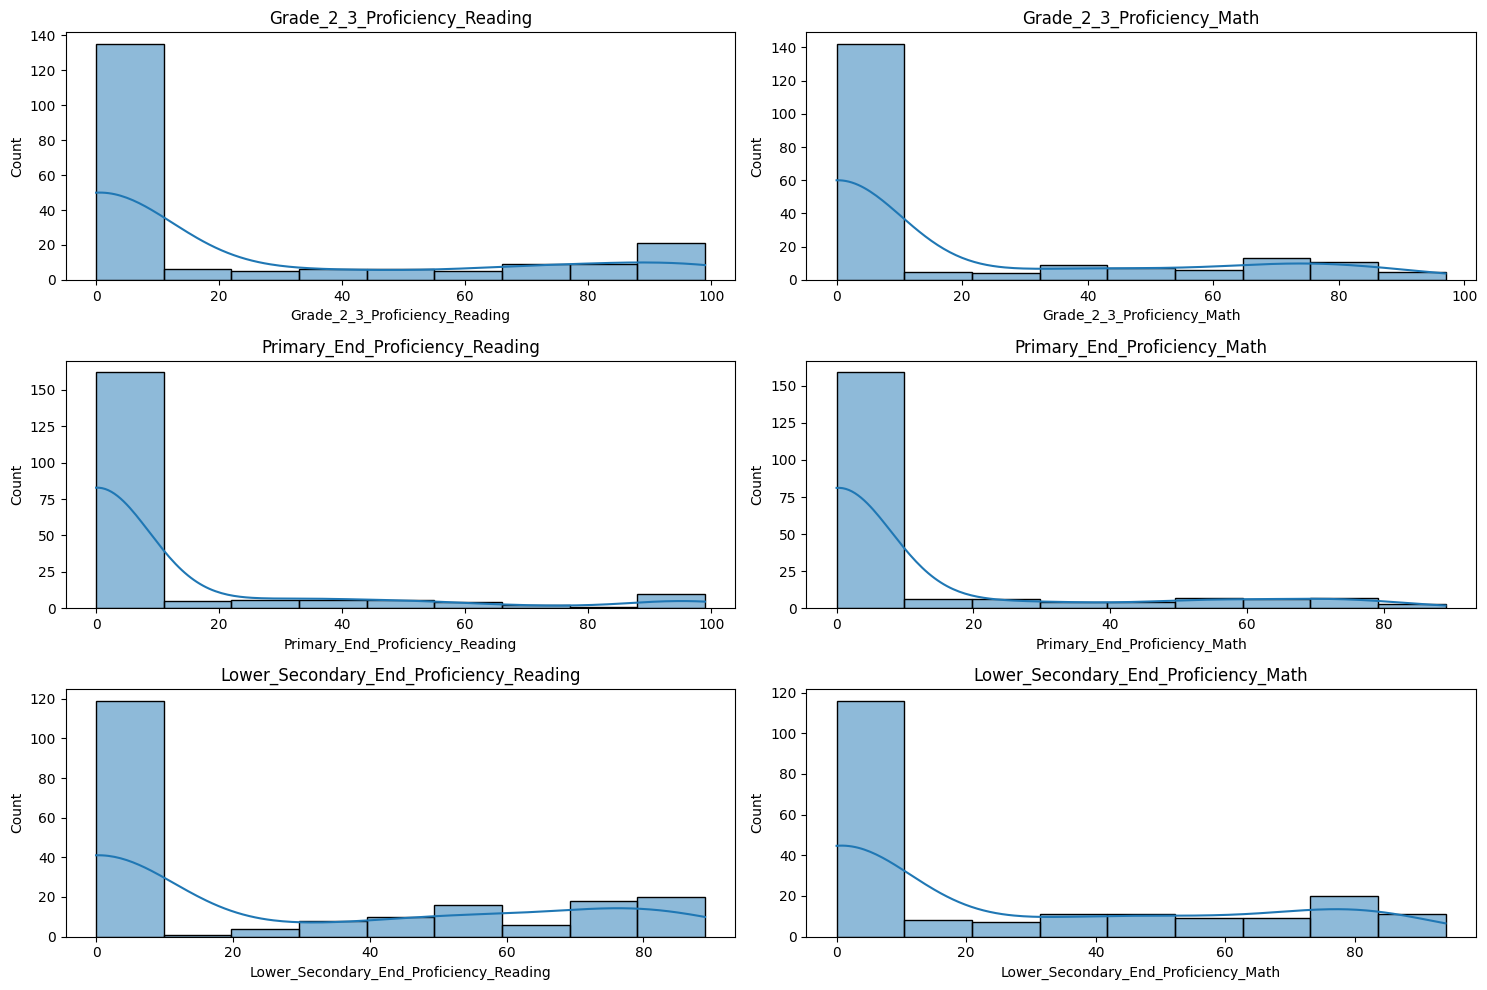

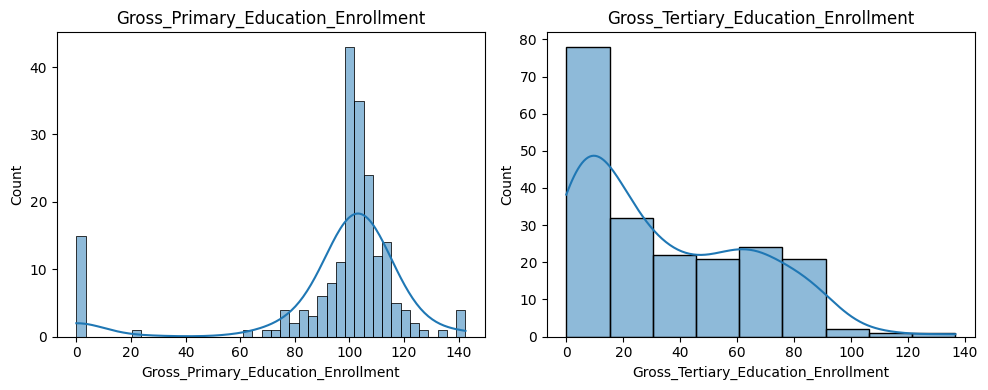

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

proficiency_cols = [
    'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math'
]

enrollment_cols = [
    'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment'
]

# Plot histograms for proficiency columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(proficiency_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot histograms for enrollment columns
plt.figure(figsize=(10, 4))
for i, col in enumerate(enrollment_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform descriptive statistics and analyze the distribution of key variables.


**Reasoning**:
Calculate and display descriptive statistics for all numerical columns and value counts for categorical columns as requested by the instructions to understand the distribution of key variables.



In [ ]:
# 1. Calculate and display descriptive statistics for all numerical columns
print("Descriptive statistics for numerical columns:")
display(df.describe())

# 2. Calculate and display the value counts for categorical columns
# Identify categorical columns from df.info() which showed 'object' dtype
categorical_cols = df.select_dtypes(include='object').columns

print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# 3. Analyze the results - This step is observational and will be done after the code execution.

Descriptive statistics for numerical columns:


,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000



Value counts for categorical columns:

Value counts for 'Countries and areas':


,count
Countries and areas,
Afghanistan,1
Albania,1
Algeria,1
Andorra,1
Angola,1
...,...
Venezuela,1
Vietnam,1
Yemen,1


## Data visualization

### Subtask:
Create visualizations to explore relationships between variables and identify patterns.


**Reasoning**:
Generate a correlation heatmap for the numerical columns to visualize relationships, create scatter plots to explore relationships between key pairs of variables, and use box plots to visualize the distribution of numerical variables across relevant categories as requested by the subtask instructions.



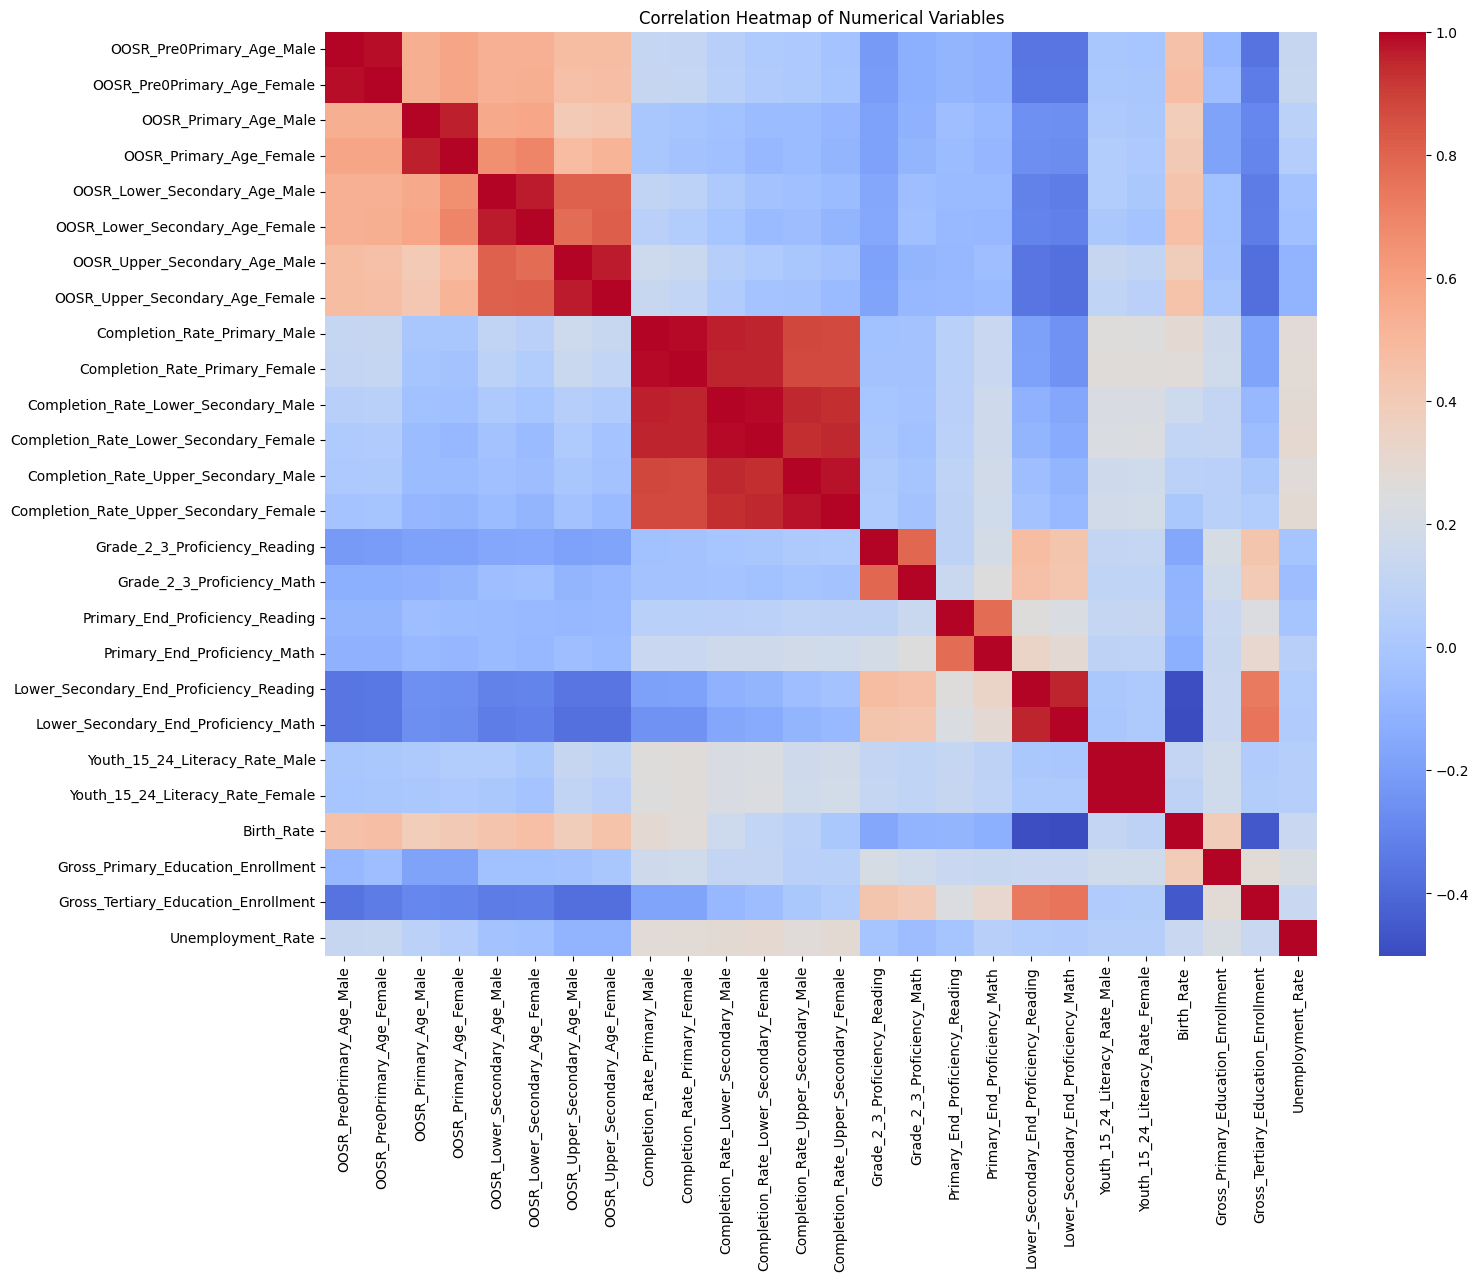

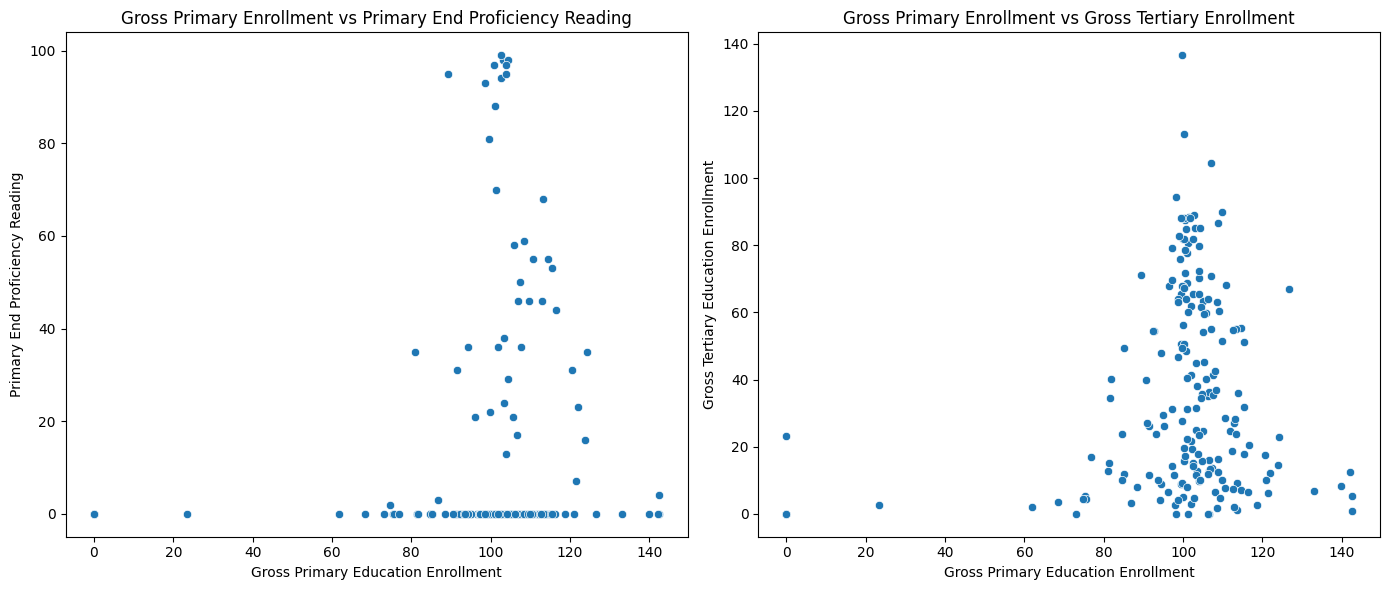

Skipping box plots by category as the only categorical column 'Countries and areas' has too many unique values.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Exclude 'Latitude' and 'Longitude' from correlation heatmap as they are geographical coordinates
numerical_cols_for_corr = numerical_cols.drop(['Latitude ', 'Longitude'])

plt.figure(figsize=(16, 12))
correlation_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 2. Create scatter plots for relevant pairs of variables
# Example pairs: Enrollment vs Proficiency, Different levels of enrollment
plt.figure(figsize=(14, 6))

# Scatter plot: Gross Primary Enrollment vs Primary End Proficiency Reading
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Gross_Primary_Education_Enrollment', y='Primary_End_Proficiency_Reading')
plt.title('Gross Primary Enrollment vs Primary End Proficiency Reading')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Primary End Proficiency Reading')

# Scatter plot: Gross Primary Enrollment vs Gross Tertiary Enrollment
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Gross_Primary_Education_Enrollment', y='Gross_Tertiary_Education_Enrollment')
plt.title('Gross Primary Enrollment vs Gross Tertiary Enrollment')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Gross Tertiary Education Enrollment')

plt.tight_layout()
plt.show()


# 3. Use box plots to visualize the distribution of key numerical variables across different categories
# The only categorical column is 'Countries and areas', which has too many unique values for box plots.
# However, if there were other categorical columns (e.g., 'Region', 'Income Level'), we would use box plots.
# Since there are no other relevant categorical columns, we can skip this step or note its impracticality.
print("Skipping box plots by category as the only categorical column 'Countries and areas' has too many unique values.")


## Summary:

### Data Analysis Key Findings

*   The dataset contains 202 rows and 29 columns, with no explicit missing values.
*   The data is a mix of numerical (`float64`, `int64`) and categorical (`object`) types.
*   Descriptive statistics highlight variability in numerical columns, particularly proficiency rates which show a large number of zero values.
*   Value counts for the 'Countries and areas' column confirm each country/area appears exactly once.
*   The correlation heatmap reveals relationships between numerical variables, such as the inverse correlation between Out-of-School Rates (OOSR) and Gross Enrollment Ratios (GER).
*   Scatter plots show the relationship between 'Gross\_Primary\_Education\_Enrollment' and 'Primary\_End\_Proficiency\_Reading', and 'Gross\_Primary\_Education\_Enrollment' and 'Gross\_Tertiary\_Education\_Enrollment'.

### Insights or Next Steps

*   Investigate the zero values in proficiency columns further to determine if they represent missing data or actual zero proficiency, and decide on an appropriate handling strategy (e.g., imputation, exclusion) based on the analysis goals.
*   Given the large number of unique values in the 'Countries and areas' column, consider grouping countries by region or income level (if such data is available) for more meaningful categorical analysis and visualization.
